# Part C

In [1]:
import numpy as np
import scipy as sp
import numpy as np
from scipy.special import jv, yv
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

For this problem we will take $b=3a$ and define

$$x \equiv \frac{\sqrt{2mE}a}{\hbar} $$ 

Thus our equation to solve is

$$N_{\nu}(x)J_{\nu}(3x)-N_{\nu}(3x)J_{\nu}(x)=0 $$

where $\nu=-\frac{e\Phi}{2 \pi \hbar}+l$. 

Here $H \equiv e\Phi/2 \pi \hbar$

In [2]:
def nu(l, H):
    return l-H

def func(x,v):
    return jv(v,x)*yv(v,3*x)-jv(v,3*x)*yv(v,x)

Two functions:

* **find_zeros** Takes a numerical array and finds the places where the value switches sign. This is a primitive way of finding the zeros of a function, but it is all that is necessary here

* **get_roots** Uses the find_zeros function. This function takes a given value of $H \equiv e\Phi/2 \pi \hbar$, and iterates over a few surrounding integer values of to find the smallest roots. It only returns the smallest roots.

In [3]:
def find_zeros(arr, x):
    idx = np.argwhere(np.diff(np.sign(arr))).flatten()
    return x[idx]

def get_roots(H, l):
    
    H_int = int(H)
    x = np.linspace(0.01,3,5000)
    roots= list(find_zeros(func(x, nu(H_int-l, H)), x))
        
    return np.unique(np.array(sorted(roots)))[0:4]

Get array of $H$ values from 0 to 3 and find the smallest energy levels.

In [4]:
Hs = np.linspace(0,3,500)
E_levels = np.array([np.array([get_roots(H, l) for H in Hs]).T for l in range(-3,3)])
E_levels = E_levels.reshape(-1,len(E_levels[0][0]))

Plot energy levels.

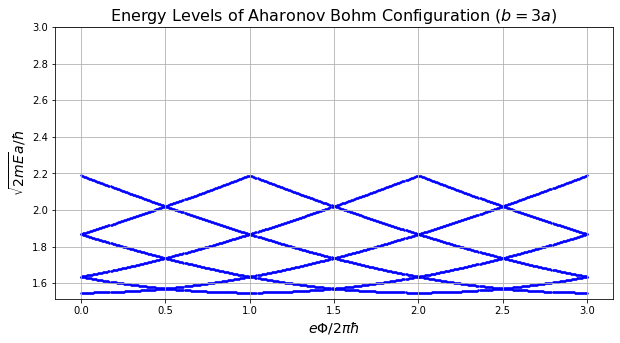

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
[ax.scatter(Hs,E_level, color='b', s=2) for E_level in E_levels]
plt.xlabel('$e\Phi/2 \pi \hbar$', fontsize=14)
plt.ylabel(r'$\sqrt{2mE}a/\hbar$', fontsize=14)
plt.ylim(top=3)
plt.grid()
plt.title('Energy Levels of Aharonov Bohm Configuration ($b=3a$)', fontsize=16)
plt.show()

I know you said the plot above is fine, but in python it is very easy to seperate these arrays into seperate arrays for the differing energies. Then we can have these as different colours on the plot.

In [6]:
E0 = np.partition(E_levels, 0, axis=0)[0]
E1 = np.partition(E_levels, 1, axis=0)[1]
E2 = np.partition(E_levels, 2, axis=0)[2]
E3 = np.partition(E_levels, 3, axis=0)[3]
Es = [E0, E1, E2, E3]

Plot

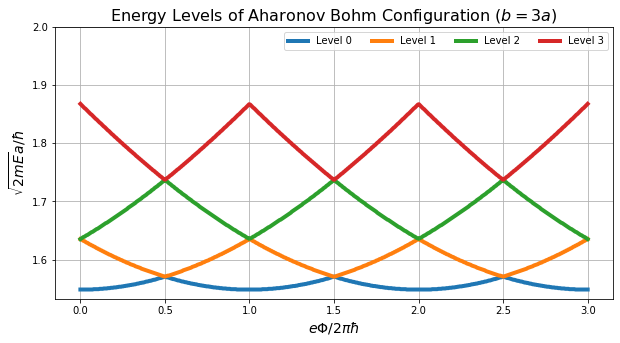

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
[ax.plot(Hs,E, lw=4, label='Level {}'.format(i)) for i, E in enumerate(Es)]
plt.xlabel('$e\Phi/2 \pi \hbar$', fontsize=14)
plt.ylabel(r'$\sqrt{2mE}a/\hbar$', fontsize=14)
plt.ylim(top=2)
plt.grid()
plt.legend(ncol=4)
plt.title('Energy Levels of Aharonov Bohm Configuration ($b=3a$)', fontsize=16)
plt.show()